In [1]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Database connection parameters
DB_NAME = "grupo-07-ods-15"
DB_USER = "postgres"
DB_PASSWORD = "password"
DB_HOST = "localhost" 
DB_PORT = "5432"   

In [5]:
def create_tables():
    # SQL commands for creating tables
    return (
        """
        CREATE EXTENSION IF NOT EXISTS "uuid-ossp"
        """,
        """
        CREATE TABLE IF NOT EXISTS Localizacao (
            id_localizacao UUID PRIMARY KEY,
            estado VARCHAR(30),
            regiao VARCHAR(20),
            bioma VARCHAR(50))
        """,
        """
        CREATE TABLE IF NOT EXISTS Especie (
            id_especie UUID PRIMARY KEY,
            nome VARCHAR(100),
            filo VARCHAR(50),
            ordem VARCHAR(50),
            classe VARCHAR(50),
            familia VARCHAR(50),
            genero VARCHAR(50),
            grupo VARCHAR(50),
            endemica_brasil CHAR(3),
            migratoria CHAR(3))
        """,
        """
        CREATE TABLE IF NOT EXISTS Conservacao (
            id_conservacao UUID PRIMARY KEY,
            nome VARCHAR(500))
        """,
        """
        CREATE TABLE IF NOT EXISTS Plano_de_Acao_Nacional (
            id_pan VARCHAR(20) PRIMARY KEY,
            pan_nome VARCHAR(50),
            pan_nome_completo VARCHAR(500),
            pan_nome_fantasia VARCHAR(50),
            pan_abreviacao_taxonomica VARCHAR(100),
            pan_ciclo VARCHAR(15),
            pan_status VARCHAR(30),
            pan_inicio_data DATE,
            pan_fim_data DATE,
            pan_abrangencia_geografica VARCHAR(100))
        """,
        """
        CREATE TABLE IF NOT EXISTS Especie_PAN (
            id_especie UUID REFERENCES Especie(id_especie),
            id_pan VARCHAR(20) REFERENCES Plano_de_Acao_Nacional(id_pan),
            PRIMARY KEY (id_especie, id_pan))
        """,
        """
        CREATE TABLE IF NOT EXISTS Risco (
            id_risco UUID PRIMARY KEY,
            id_especie UUID REFERENCES Especie(id_especie),
            tendencia_populacional VARCHAR(30),
            ameaca VARCHAR(100),
            categoria VARCHAR(30),
            possivelmente_extinta CHAR(3),
            uso VARCHAR(50))
        """,
        """
        CREATE TABLE IF NOT EXISTS Portaria (
            id_portaria UUID PRIMARY KEY,
            id_pan VARCHAR(20) REFERENCES Plano_de_Acao_Nacional(id_pan),
            pan_status_legal VARCHAR(200),
            data_da_portaria_vigente_do_PAN DATE)
        """,
        """
        CREATE TABLE IF NOT EXISTS Especie_Conservacao (
            id_especie_id_conservacao UUID PRIMARY KEY,
            id_especie UUID REFERENCES Especie(id_especie),
            id_conservacao UUID REFERENCES Conservacao(id_conservacao))
        """,
        """
        CREATE TABLE IF NOT EXISTS Especie_Localizacao (
            id_especie UUID REFERENCES Especie(id_especie),
            id_localizacao UUID REFERENCES Localizacao(id_localizacao),
            PRIMARY KEY (id_especie, id_localizacao))
        """,
        """
        CREATE TABLE IF NOT EXISTS PAN_Localizacao (
            id_pan VARCHAR(20) REFERENCES Plano_de_Acao_Nacional(id_pan),
            id_localizacao UUID REFERENCES Localizacao(id_localizacao),
            PRIMARY KEY (id_pan, id_localizacao))
        """
    )

In [3]:
def connect():
    conn = None
    try:
        # Connect to the PostgreSQL server
        conn = psycopg2.connect(
            dbname=DB_NAME,
            user=DB_USER,
            password=DB_PASSWORD,
            host=DB_HOST,
            port=DB_PORT
        )
        cur = conn.cursor()
        return conn, cur

    except (Exception, psycopg2.DatabaseError) as error:
        print(f"Error: {error}")
        if conn:
            conn.rollback()

In [4]:
conn, cur = connect()

Criação das tabelas

In [7]:
commands = create_tables()
for command in commands:
    try:
        cur.execute(command)
    except psycopg2.Error as e:
        print(f"Error executing command: {command}")
        print(f"Details: {e}")
        raise

conn.commit()

População das tabelas

In [8]:
sql = """
COPY Localizacao (id_localizacao, estado, regiao, bioma)
FROM STDIN WITH (
    FORMAT CSV,
    HEADER,
    DELIMITER ',',
    NULL 'NULL'
)
"""
with open('csv/localizacao.csv', 'r', encoding='utf-8') as f:
    cur.copy_expert(sql, f)
conn.commit()

In [9]:
sql = """
COPY Especie (id_especie, nome, filo, ordem, classe, familia, genero, grupo, endemica_brasil, migratoria)
FROM STDIN WITH (
    FORMAT CSV,
    HEADER,
    DELIMITER ',',
    NULL 'NULL'
)
"""
with open('csv/especie.csv', 'r', encoding='utf-8') as f:
    cur.copy_expert(sql, f)
conn.commit()


In [10]:
sql = """
COPY Conservacao (id_conservacao, nome)
FROM STDIN WITH (
    FORMAT CSV,
    HEADER,
    DELIMITER ',',
    NULL 'NULL'
)
"""
with open('csv/conservacao.csv', 'r', encoding='utf-8') as f:
    cur.copy_expert(sql, f)
conn.commit()


In [11]:
sql = """
COPY Plano_de_Acao_Nacional (id_pan, pan_nome, pan_nome_completo, pan_nome_fantasia, pan_abreviacao_taxonomica, pan_ciclo, pan_status, pan_inicio_data, pan_fim_data, pan_abrangencia_geografica)
FROM STDIN WITH (
    FORMAT CSV,
    HEADER,
    DELIMITER ',',
    NULL 'NULL'
)
"""
with open('csv/pan.csv', 'r', encoding='utf-8') as f:
    cur.copy_expert(sql, f)
conn.commit()

In [12]:
sql = """
COPY Especie_PAN (id_especie, id_pan)
FROM STDIN WITH (
    FORMAT CSV,
    HEADER,
    DELIMITER ',',
    NULL 'NULL'
)
"""
with open('csv/especie-pan.csv', 'r', encoding='utf-8') as f:
    cur.copy_expert(sql, f)
conn.commit()


In [13]:
sql = """
COPY Risco (id_risco, id_especie, tendencia_populacional, ameaca, categoria, possivelmente_extinta, uso)
FROM STDIN WITH (
    FORMAT CSV,
    HEADER,
    DELIMITER ',',
    NULL 'NULL'
)
"""
with open('csv/risco.csv', 'r', encoding='utf-8') as f:
    cur.copy_expert(sql, f)
conn.commit()


In [14]:
sql = """
COPY Portaria (id_portaria, id_pan, pan_status_legal, data_da_portaria_vigente_do_PAN)
FROM STDIN WITH (
    FORMAT CSV,
    HEADER,
    DELIMITER ',',
    NULL 'NULL'
)
"""
with open('csv/portaria.csv', 'r', encoding='utf-8') as f:
    cur.copy_expert(sql, f)
conn.commit()


In [15]:
sql = """
COPY Especie_Conservacao (id_especie_id_conservacao, id_especie, id_conservacao)
FROM STDIN WITH (
    FORMAT CSV,
    HEADER,
    DELIMITER ',',
    NULL 'NULL'
)
"""
with open('csv/especie-conservacao.csv', 'r', encoding='utf-8') as f:
    cur.copy_expert(sql, f)
conn.commit()


In [16]:
sql = """
COPY Especie_Localizacao (id_especie, id_localizacao)
FROM STDIN WITH (
    FORMAT CSV,
    HEADER,
    DELIMITER ',',
    NULL 'NULL'
)
"""
with open('csv/especie-localizacao.csv', 'r', encoding='utf-8') as f:
    cur.copy_expert(sql, f)
conn.commit()


In [17]:
sql = """
COPY PAN_Localizacao (id_pan, id_localizacao)
FROM STDIN WITH (
    FORMAT CSV,
    HEADER,
    DELIMITER ',',
    NULL 'NULL'
)
"""
with open('csv/pan-localizacao.csv', 'r', encoding='utf-8') as f:
    cur.copy_expert(sql, f)
conn.commit()

Consultas

1. Detecção das espécies tipicamente brasileiras muito ameaçadas em cada bioma e que ainda não estão protegidas por um plano nacional de conservação.

In [8]:
query = """
SELECT 
    l.bioma,
    COALESCE(COUNT(DISTINCT e.id_especie), 0) AS total_especies,
    COALESCE(STRING_AGG(DISTINCT e.nome, ', ' ORDER BY e.nome), 'Sem registro') AS especies
FROM 
    Localizacao l
LEFT JOIN 
    Especie_Localizacao el ON l.id_localizacao = el.id_localizacao
LEFT JOIN 
    Especie e ON el.id_especie = e.id_especie
LEFT JOIN 
    Risco r ON e.id_especie = r.id_especie
LEFT JOIN 
    Especie_PAN ep ON e.id_especie = ep.id_especie
WHERE 
    (e.endemica_brasil = 'Sim' AND r.categoria = 'Criticamente em Perigo' AND ep.id_especie IS NULL)
    OR e.id_especie IS NULL
GROUP BY 
    l.bioma
ORDER BY 
    total_especies DESC;

"""

df = pd.read_sql(query, conn)

df



,bioma,total_especies,especies
0,Mata Atlântica,6,"Aethiopella littoralis, Archisotoma arariboia,..."
1,Amazônia,1,Anomaloglossus tepequem
2,Caatinga,0,Sem registro
3,Cerrado,0,Sem registro
4,Pampa,0,Sem registro
5,Sistema Costeiro-Marinho,0,Sem registro


2. Correlação entre categorias de risco e número de ações de conservação

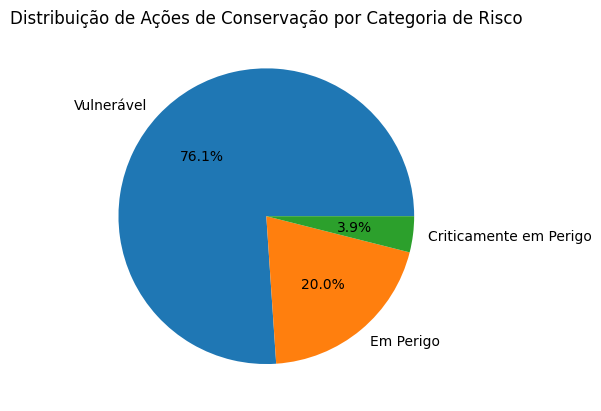

In [14]:
query = """
SELECT r.categoria, COUNT(DISTINCT ec.id_conservacao) AS total_acoes
FROM Risco r
JOIN Especie e ON r.id_especie = e.id_especie
JOIN Especie_Conservacao ec ON e.id_especie = ec.id_especie
GROUP BY r.categoria
ORDER BY total_acoes DESC;
"""

df2 = pd.read_sql(query, conn)

df2.plot(kind='pie', y='total_acoes', labels=df2['categoria'], legend=False, autopct='%1.1f%%')
plt.title('Distribuição de Ações de Conservação por Categoria de Risco')
plt.ylabel('')
plt.show()


3. Detecção de Espécies em Situação Crítica com Lacunas de Proteção e Ação Governamental

In [ ]:
query = """
WITH especies_criticas AS (
    SELECT e.id_especie, e.nome
    FROM Especie e
    JOIN Risco r ON e.id_especie = r.id_especie
    WHERE r.categoria = 'Criticamente em Perigo'
),
sem_pan_ativo AS (
    SELECT ec.id_especie
    FROM especies_criticas ec
	LEFT JOIN Especie_PAN esp_pan 
        ON ec.id_especie = esp_pan.id_especie
    LEFT JOIN Plano_de_Acao_Nacional pan 
        ON esp_pan.id_pan = pan.id_pan 
       AND CURRENT_DATE BETWEEN pan.pan_inicio_data AND pan.pan_fim_data
    WHERE pan.id_pan IS NULL
),
sem_portaria AS (
    SELECT ec.id_especie
    FROM especies_criticas ec
    LEFT JOIN Especie_PAN esp_pan 
        ON ec.id_especie = esp_pan.id_especie
    LEFT JOIN Plano_de_Acao_Nacional pan 
        ON esp_pan.id_pan = pan.id_pan 
    LEFT JOIN Portaria p ON pan.id_pan = p.id_pan
    WHERE p.id_portaria IS NULL
),
sem_conservacao AS (
    SELECT ec.id_especie
    FROM especies_criticas ec
    LEFT JOIN Especie_Conservacao ecv ON ec.id_especie = ecv.id_especie
    WHERE ecv.id_conservacao IS NULL
)
SELECT 
    e.nome AS especie,
    'Criticamente em Perigo' AS categoria,
    CASE WHEN sp.id_especie IS NOT NULL THEN 'Sem plano de ação ativo' ELSE NULL END AS problema_pan,
    CASE WHEN pr.id_especie IS NOT NULL THEN 'Sem portaria vigente' ELSE NULL END AS problema_portaria,
    CASE WHEN scv.id_especie IS NOT NULL THEN 'Sem área de conservação' ELSE NULL END AS problema_conservacao
FROM especies_criticas e
LEFT JOIN sem_pan_ativo sp ON e.id_especie = sp.id_especie
LEFT JOIN sem_portaria pr ON e.id_especie = pr.id_especie
LEFT JOIN sem_conservacao scv ON e.id_especie = scv.id_especie
WHERE sp.id_especie IS NOT NULL 
   OR pr.id_especie IS NOT NULL 
   OR scv.id_especie IS NOT NULL
ORDER BY e.nome;
"""

df3 = pd.read_sql(query, conn)

def highlight_problems(val):
    if pd.notnull(val):
        return 'background-color: red; color: white'
    return ''

df3.style.applymap(highlight_problems, subset=['problema_pan', 'problema_portaria', 'problema_conservacao'])

,especie,categoria,problema_pan,problema_portaria,problema_conservacao
0,Actinote zikani,Criticamente em Perigo,Sem plano de ação ativo,None,None
1,Adelophryne maranguapensis,Criticamente em Perigo,Sem plano de ação ativo,None,Sem área de conservação
2,Adelophryne maranguapensis,Criticamente em Perigo,Sem plano de ação ativo,None,Sem área de conservação
3,Aegla brevipalma,Criticamente em Perigo,Sem plano de ação ativo,None,Sem área de conservação
4,Aegla franca,Criticamente em Perigo,Sem plano de ação ativo,None,Sem área de conservação
5,Aegla leptochela,Criticamente em Perigo,None,None,Sem área de conservação
6,Aegla perobae,Criticamente em Perigo,Sem plano de ação ativo,None,Sem área de conservação
7,Aegla renana,Criticamente em Perigo,Sem plano de ação ativo,None,Sem área de conservação
8,Aethiopella littoralis,Criticamente em Perigo,Sem plano de ação ativo,Sem portaria vigente,None
9,Agraphorura mariapetrae,Criticamente em Perigo,Sem plano de ação ativo,Sem portaria vigente,None


4. Planos de Ação Nacional em execução com número de espécies atendidas e estados abrangidos

In [ ]:
query = """
SELECT 
    p.pan_nome AS plano_acao,
    p.pan_abrangencia_geografica,
    COUNT(DISTINCT ep.id_especie) AS especies_atendidas,
    COUNT(DISTINCT pl.id_localizacao) AS estados_abrangidos,
	STRING_AGG(DISTINCT l.estado, ', ' ORDER BY l.estado) AS estados
FROM 
    Plano_de_Acao_Nacional p
LEFT JOIN 
    Especie_PAN ep ON p.id_pan = ep.id_pan
LEFT JOIN 
    PAN_Localizacao pl ON p.id_pan = pl.id_pan
LEFT JOIN 
    Localizacao l ON pl.id_localizacao = l.id_localizacao
WHERE p.pan_status = 'Em execução'
GROUP BY 
    p.id_pan
ORDER BY 
    especies_atendidas DESC;
"""

df4 = pd.read_sql(query, conn)

df4

,plano_acao,pan_abrangencia_geografica,especies_atendidas,estados_abrangidos,estados
0,Cavernas do Brasil,Ecossistema,16,27,"Acre, Alagoas, Amapá, Amazonas, Bahia, Ceará, ..."
1,Peixes e Eglas da Mata Atlântica,Bacia,14,17,"Alagoas, Bahia, Ceará, Espírito Santo, Goiás, ..."
2,Aves da Amazônia,Bioma,6,8,"Acre, Amapá, Amazonas, Mato Grosso, Pará, Rond..."
3,Herpetofauna do Nordeste,Bioma,5,9,"Alagoas, Bahia, Ceará, Maranhão, Paraíba, Pern..."
4,Insetos Polinizadores,Nacional,4,31,"Amazonas, Bahia, Ceará, Distrito Federal, Espí..."
5,Aves da Mata Atlântica,Bioma,3,18,"Alagoas, Bahia, Ceará, Distrito Federal, Espír..."
6,Primatas do Nordeste,Bioma,2,9,"Alagoas, Bahia, Ceará, Maranhão, Paraíba, Pern..."
7,Aves dos Campos Sulinos,Ecossistema,2,4,"Paraná, Rio Grande do Sul, Santa Catarina"
8,Tubarões,Bioma,2,17,"Alagoas, Amapá, Bahia, Ceará, Espírito Santo, ..."
9,Primatas Amazônicos,Bioma,2,8,"Acre, Amazonas, Maranhão, Mato Grosso, Pará, R..."


5. Detecção das espécies em declínio populacional, cujos planos de ação nacional (PANs) já expiraram ou estão vencidos.

In [6]:
query = """
WITH especies_pan_expirado AS (
    SELECT 
        e.id_especie,
        e.nome AS nome_especie,
        pan.pan_nome AS nome_pan_expirado
    FROM 
        Especie e
    JOIN 
        Especie_PAN ep ON e.id_especie = ep.id_especie
    JOIN 
        Plano_de_Acao_Nacional pan ON ep.id_pan = pan.id_pan
    WHERE 
        (pan.pan_status = 'Finalizado')
),
especies_pan_vigente AS (
    SELECT 
        DISTINCT e.id_especie
    FROM 
        Especie e
    JOIN 
        Especie_PAN ep ON e.id_especie = ep.id_especie
    JOIN 
        Plano_de_Acao_Nacional pan ON ep.id_pan = pan.id_pan
    WHERE 
        (pan.pan_status = 'Em execução')
)

SELECT 
    epe.nome_especie,
    epe.nome_pan_expirado,
    r.tendencia_populacional
FROM 
    especies_pan_expirado epe
JOIN 
    Risco r ON epe.id_especie = r.id_especie
WHERE 
    r.tendencia_populacional = 'Declinando'
    AND epe.id_especie NOT IN (SELECT id_especie FROM especies_pan_vigente)
ORDER BY 
    epe.nome_especie;

"""

df5 = pd.read_sql(query, conn)
df5.style.applymap(lambda x: 'background-color: red; color: white' if x == 'Declinando' else '')


,nome_especie,nome_pan_expirado,tendencia_populacional
0,Amazona pretrei,Papagaios,Declinando
1,Amazona rhodocorytha,Papagaios,Declinando
2,Amazona vinacea,Papagaios,Declinando
3,Antilophia bokermanni,Soldadinho-do-araripe,Declinando


In [10]:
# Close communication with the PostgreSQL
cur.close()
# Close the connection
conn.close()